In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
loc = r"C:\Users\madhu\Downloads\Compressed\sars-outbreak-2003-complete-dataset\sars_2003_complete_dataset_clean.csv"

In [3]:
sars = pd.read_csv(loc, parse_dates=['Date'])
sars.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [4]:
sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
Date                            2538 non-null datetime64[ns]
Country                         2538 non-null object
Cumulative number of case(s)    2538 non-null int64
Number of deaths                2538 non-null int64
Number recovered                2538 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 99.3+ KB


In [5]:
sars.sort_values('Date', inplace=True)
sars = sars.set_index('Date')

In [6]:
grouped = sars.groupby(['Country']).max().sort_values(['Cumulative number of case(s)'], ascending=False).reset_index()
grouped

,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,China,5329,348,4941
1,"Hong Kong SAR, China",1755,298,1433
2,"Taiwan, China",698,84,507
3,Canada,252,38,194
4,United States,220,0,67
5,Singapore,206,32,172
6,Viet Nam,63,5,58
7,Philippines,14,2,12
8,Germany,10,0,9
9,Italy,9,0,9


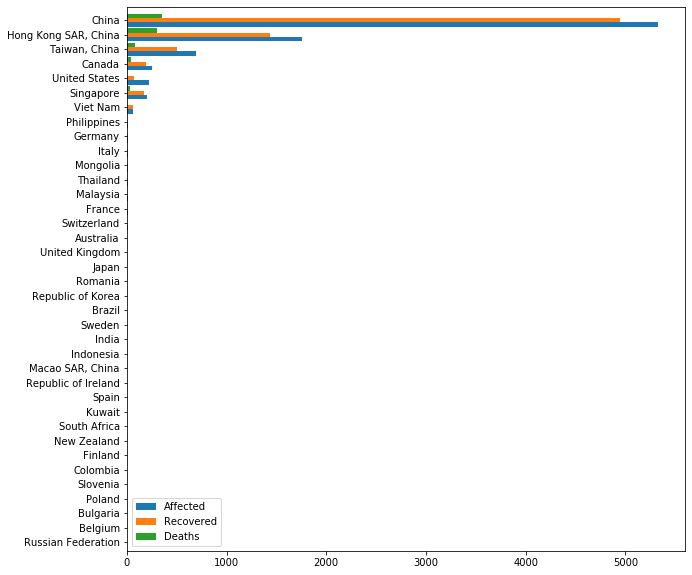

In [7]:
affected= sars.groupby(['Country']).max()['Cumulative number of case(s)'].head(50).sort_values(ascending=True)
deaths = sars.groupby(['Country']).max()['Number of deaths'].head(50).reindex(affected.index, axis=0)
recovered = sars.groupby(['Country']).max()['Number recovered'].head(50).reindex(affected.index, axis=0)
pos = list(range(len(affected)))
fig, ax = plt.subplots(figsize=(10,10))
w = .3
plt.barh([p for p in pos], affected, w, color=next(color_cycle), label='Affected')
plt.barh([p+w for p in pos], recovered, w, color=next(color_cycle), label='Recovered')
plt.barh([p+(2*w) for p in pos], deaths, w, color=next(color_cycle), label='Deaths')

plt.ylim(min(pos)-w, max(pos)+w*4)
ax.set_yticks([p+w for p in pos])
ax.set_yticklabels(affected.index)
plt.legend()
plt.show()


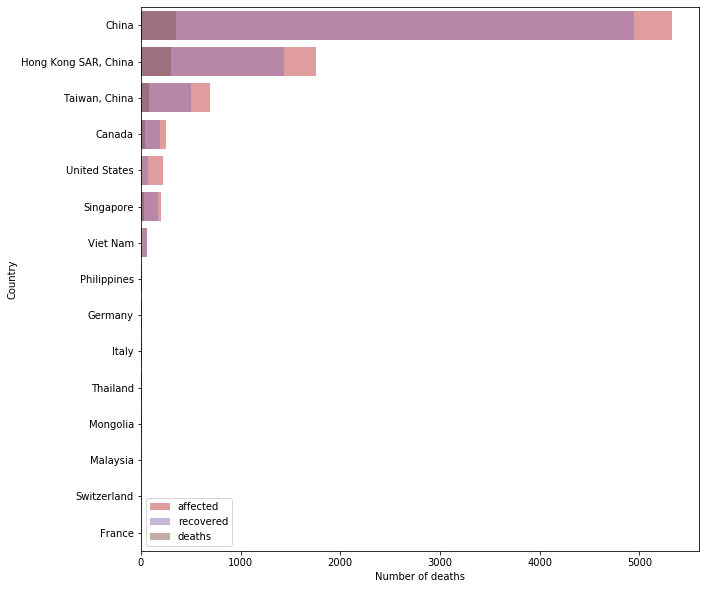

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y='Country', x='Cumulative number of case(s)', data=grouped.head(15), color=next(color_cycle),alpha=0.5, label='affected')
sns.barplot(y='Country', x='Number recovered', data=grouped.head(15), color=next(color_cycle),alpha=0.5, label='recovered')
sns.barplot(y='Country', x='Number of deaths', data=grouped.head(15), color=next(color_cycle),alpha=0.5, label='deaths')
plt.legend()

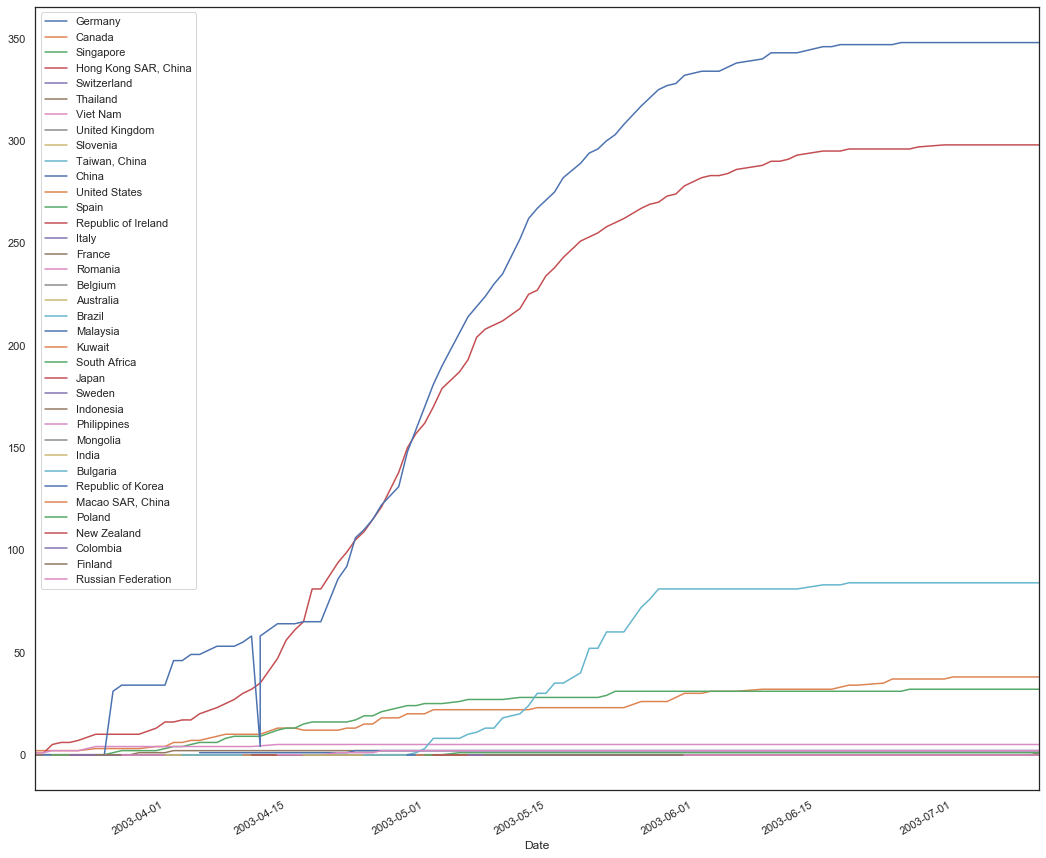

In [9]:
sns.set(rc={'figure.figsize':(18,16)})
sns.set(style='white')
for country in  sars.Country.unique():
    df = sars[sars.Country==country]['Number of deaths']
    df.plot(label=str(country))
    plt.legend()

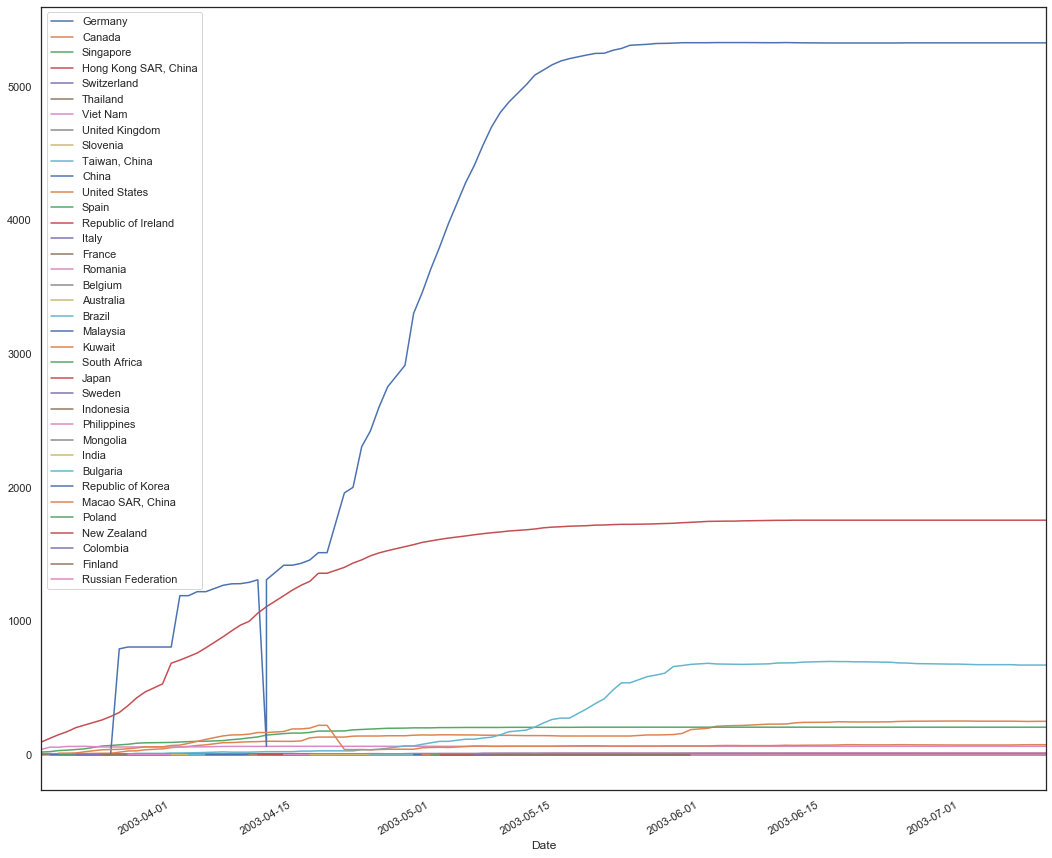

In [10]:
sns.set(rc={'figure.figsize':(18,16)})
sns.set(style='white')
for country in  sars.Country.unique():
    df = sars[sars.Country==country]['Cumulative number of case(s)']
    df.plot(label=str(country))
    plt.legend()

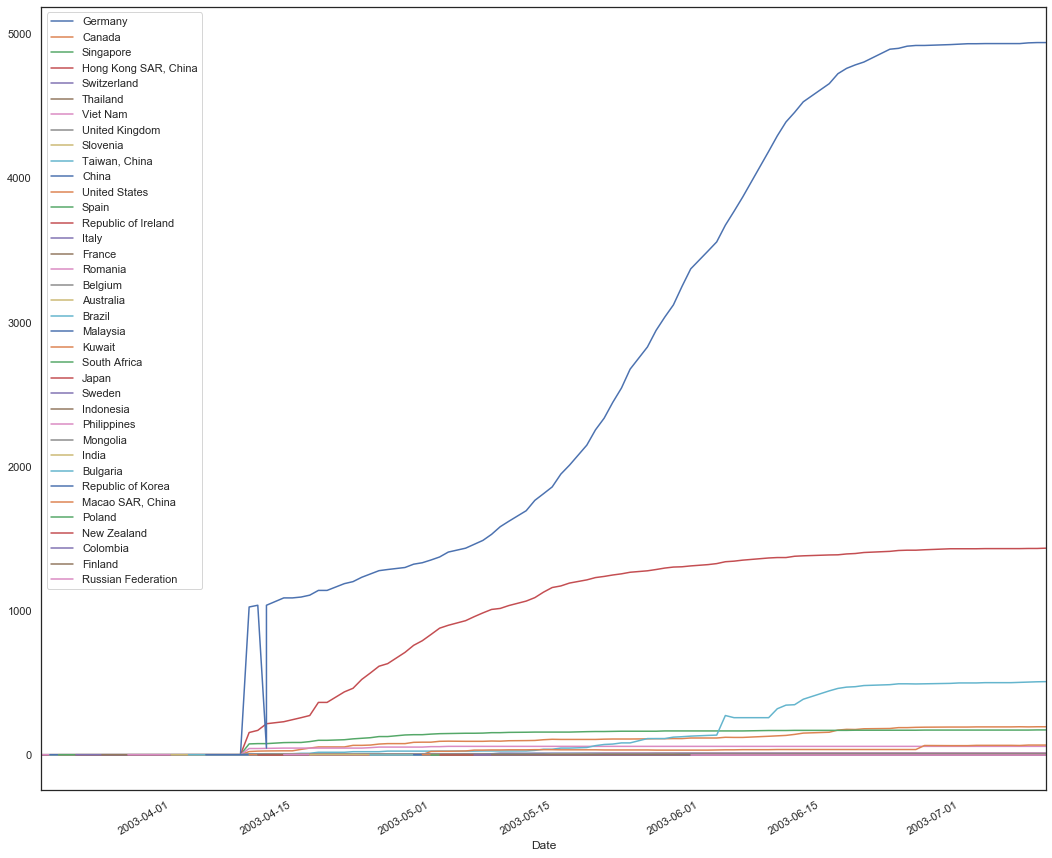

In [11]:
sns.set(rc={'figure.figsize':(18,16)})
sns.set(style='white')
for country in  sars.Country.unique():
    df = sars[sars.Country==country]['Number recovered']
    df.plot(label=str(country))
    plt.legend()